In [1]:
import sys 
sys.path.append('../fsp')
import marketDataAnalysis as mda
import pandas_datareader.data as web
import pandas as pd
from datetime import datetime, timedelta
from IPython.display import Math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import scipy.optimize as optimize
from numpy import random
from timeSeriesModeling import ARCH


<AxesSubplot: >

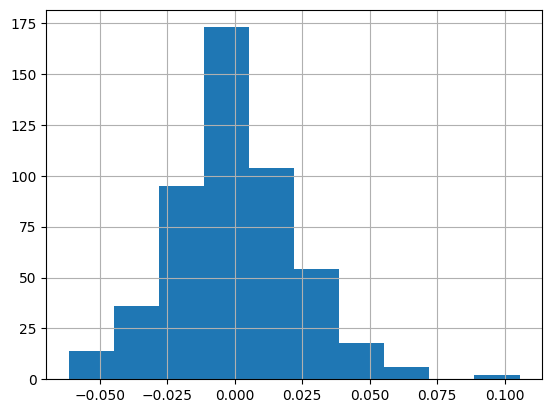

In [2]:
# I'm doing this on a plane, so I can't access the internet, so this stuff doesn't work, alas I am using some csvs I downloaded. 
# startdate= datetime(year=2017,month=12,day=29)
# enddate= datetime(year=2018,month=12,day=31)
# tech_ticks = ['NVDA', 'GOOGL', 'AMZN', 'META', 'MSFT']

# stocks = mda.get_stock_data(tech_ticks, startdate, enddate)
# stocks.head()


# read in stock data from csv
nvdia = pd.read_csv("../TSM.csv")
nvdia.drop(labels=["Open", "High", "Low", "Close","Volume"], axis=1, inplace=True)

nvdia["Adj Close Pct Change"] = nvdia["Adj Close"].pct_change()
nvdia["Adj Close Pct Change"] -= np.mean(nvdia["Adj Close Pct Change"])
nvdia.head()
nvdia["Adj Close Pct Change"].hist()

Text(0.5, 1.0, 'Daily Adj Close Pct Change Squared, zero mean')

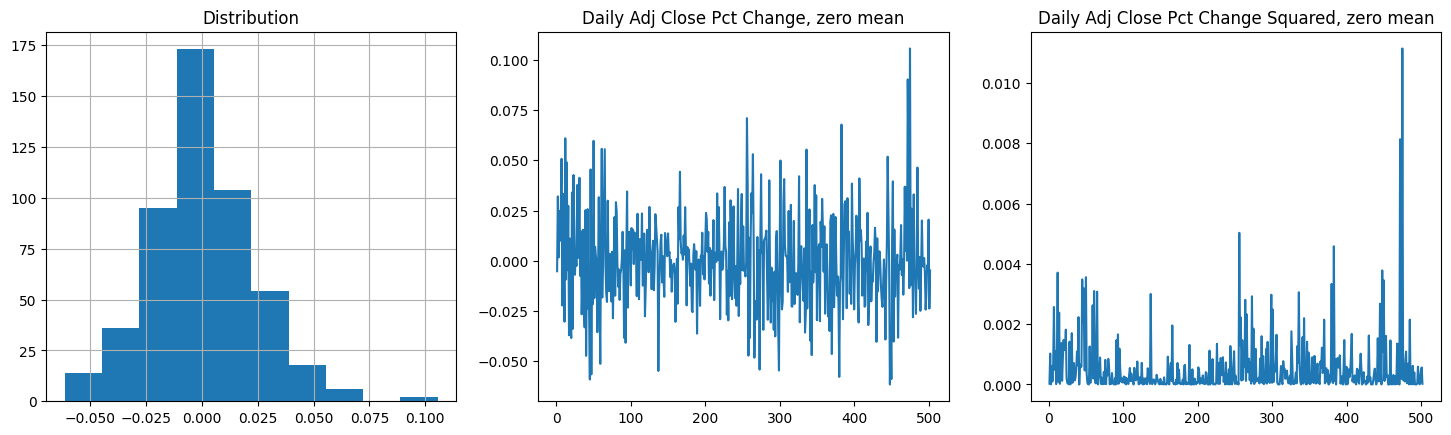

In [3]:
fig, axs = plt.subplots(1,3)
fig.set_figwidth(18)
nvdia["Adj Close Pct Change"].hist(ax=axs[0])
axs[0].set_title("Distribution")
axs[1].plot(nvdia["Adj Close Pct Change"])
axs[1].set_title("Daily Adj Close Pct Change, zero mean")
axs[2].plot(nvdia["Adj Close Pct Change"]**2)
axs[2].set_title("Daily Adj Close Pct Change Squared, zero mean")


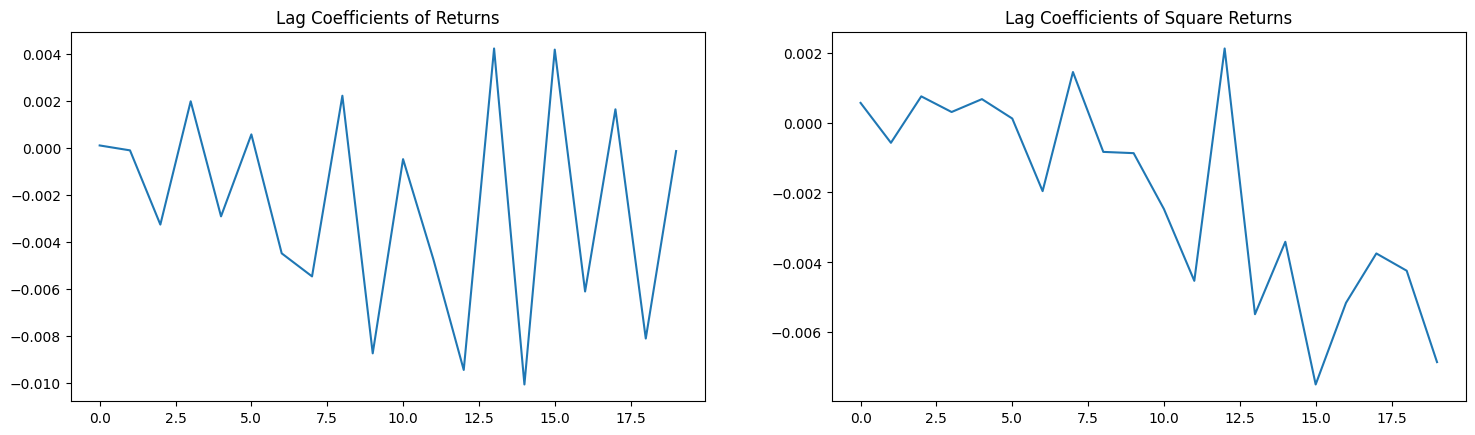

In [4]:
data = nvdia["Adj Close Pct Change"].to_list()
data.pop(0)
ndata = data
var = np.var(data)
acorr = np.correlate(ndata, ndata, 'full')
acorr = acorr / var / len(ndata)
acorr = acorr[0:20]

fig, axs = plt.subplots(1,2)

axs[0].plot(acorr)
axs[0].set_title("Lag Coefficients of Returns")
axs[1].set_title("Lag Coefficients of Square Returns")

data = np.square(data)
ndata = data - np.mean(data)
var = np.var(data)
acorr = np.correlate(ndata, ndata, 'full')
acorr = acorr / var / len(ndata)
acorr = acorr[0:20]
axs[1].plot(acorr)
fig.set_figwidth(18)

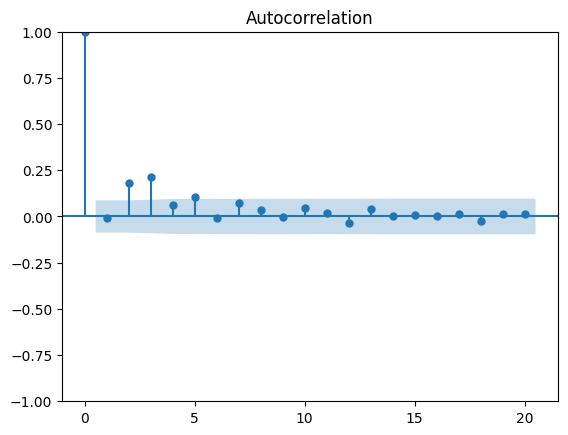

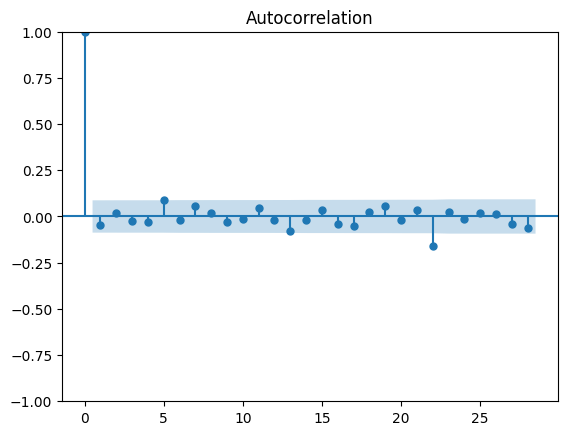

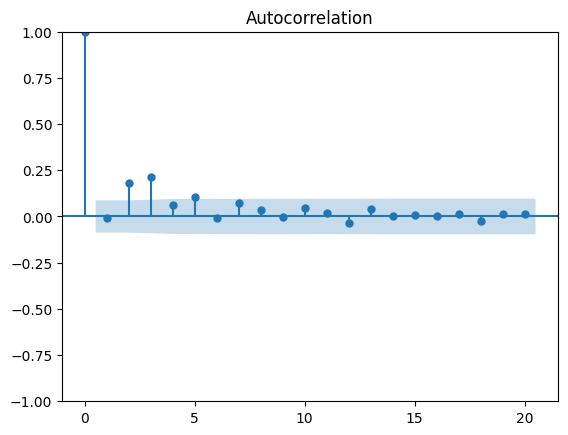

In [5]:
from statsmodels.graphics.tsaplots import plot_acf
data = nvdia["Adj Close Pct Change"].to_list()
data.pop(0)
plot_acf(np.array(data))
plot_acf(np.square(data), lags=20)

